# Assignment Brief: Fundamentals of Numpy and Pandas for Machine Learning  

## Deadline: 03 November 2023, 14:00 GMT

## Number of marks available: 10

In this practical, we will practice using numpy and pandas to implement the fundamentals of machine learning experiments such as data splitting, imputation, and model training and evaluation. 

### Please READ the whole assignment first, before starting to work on it.

### How and what to submit

A. A **Jupyter Notebook** with the code in all the cells executed and outputs displayed.

B. Name your Notebook **COMP61011_AssignmentA1_XXXXXX.ipynb** where XXXXXX is your username such as such as abc18de. Example: `COMP61011_AssignmentA1_abc18de.ipynb`

C. Upload the Jupyter Notebook in B to Blackboard under the **Computing Assignment (numpy and pandas)** submission area before the deadline. **There are two submissions: please pay close attention to submit to the right place!**

D. **NO DATA UPLOAD**: Please do not upload the data files used in this Notebook. We have a copy already. 


### Assessment Criteria 

* Being able to use numpy and pandas to preprocess a dataset.

* Being able to follow the steps involved in an end-to-end project in machine learning.

* Be able to implement, from scratch, a linear model and train it using gradient descent.


### Code quality and use of Python libraries
When writing your code, you will find out that there are operations that are repeated at least twice. These operations should be carried out in functions. Furthermore, if your code is unreadable, we may not award marks for that section. Make sure to check the following:

* Did you include Python functions to solve the question and avoid repeating code? 
* Did you comment your code to make it readable to others?

**DO NOT USE scikit-learn for the questions on this assignment. You are meant to write Python code from scratch. Using scikit-learn for the questions on this assignment will give ZERO marks. No excuse will be accepted.**

Furthermore, please try to avoid using any imports apart from the ones already provided in the Notebook. You can easily install all recommended modules for this assignment by running the following command in your terminal: `python -m pip install -r requirements.txt`


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 10% of the mark each 24 hours the work is late after the deadline. NO late submission will be marked one week after the deadline. Please read [this link](https://wiki.cs.manchester.ac.uk/index.php/UGHandbook23:Main#Late_Submission_of_Coursework_Penalty). 

### Use of unfair means 

**Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations.** Please carefully read [what constitutes Unfair Means](https://documents.manchester.ac.uk/display.aspx?DocID=2870) if not sure. If you still have questions, please ask your Personal tutor or the Lecturers.

-----------------------------------

## Background: regularised ridge regression and gradient descent

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)), [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) and the [Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization). 

Here we will build a Ridge Regression model, and implement equations to optimise the objective function using the update rules for gradient descent. You will use those update rules for making predictions on the Wine Quality dataset.

### Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_N]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{N,1} & \cdots & x_{N, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_N^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objective function** we are going to use has the following form

$$ E(\mathbf{w}, \lambda) = \frac{1}{N}\sum_{n=1}^N (y_n - f(\mathbf{x}_n))^2 + \frac{\lambda}{2}\sum_{j=0}^D w_j^2,$$

where $\lambda>0$ is known as the *regularisation* parameter.

This objective function was studied in Lecture 3. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\lambda$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\lambda$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d E(\mathbf{w}, \lambda)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d E(\mathbf{w}, \lambda)}{d\mathbf{w}}$ is the gradient of the objective function.

It can be shown (this is a question in the Exercise Sheet 3) that a closed-form expression for the optimal $\mathbf{w}_*$ is given as

\begin{align*}            
            \mathbf{w}_*& = \left(\mathbf{X}^{\top}\mathbf{X} + \frac{\lambda N}   
                                     {2}\mathbf{I}\right)^{-1}\mathbf{X}^{\top}\mathbf{y}.
\end{align*}

Alternatively, we can find an update equation for $\mathbf{w}_{\text{new}}$ using gradient descent leading to:

\begin{align*}
   \mathbf{w}_{\text{new}} & = \mathbf{w}_{\text{old}} - \eta \frac{d E(\mathbf{w}, \lambda)}
                              {d\mathbf{w}},\\
                           & = \mathbf{w}_{\text{old}} +  \frac{2\eta}{N}\sum_{n=1}^N   
                               \left(y_n - \mathbf{x}_n^{\top}\mathbf{w}_{\text{old}}\right)\mathbf{x}_n  
                       - \eta\lambda\mathbf{w}_{\text{old}}\\
                           & = (1 - \eta\lambda)\mathbf{w}_{\text{old}} + \frac{2\eta}
                               {N}\sum_{n=1}^N   
                               \left(y_n - \mathbf{x}_n^{\top}\mathbf{w}_{\text{old}}\right)\mathbf{x}_n
\end{align*}

## Pre-set up: imports and random seed

**Important: set a random seed below that corresponds to the last five digits of your student ID number.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(11342) # replace xxxxx with the last 5 digits of your student ID

## Dataset: Wine Quality

The dataset you will use in this assignment comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). **We are going to use ridge regression for predicting wine quality**. The description of the dataset can be found [on the UCI website](https://archive.ics.uci.edu/dataset/186/wine+quality) and in the extracted file `winequality.names`. A copy of the dataset is provided in the file `winequality-white-missing.csv`.

We can view some of the rows in the dataset with the `.sample()` method, or print the first few rows with the `.head()` method.

In [2]:
# Read the data into a pandas dataframe
white_wine_data = pd.read_csv('./winequality-white-missing.csv', sep=';', index_col=0)

# View 10 random rows of the data
white_wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
908,8.0,0.23,0.37,9.6,0.054,23.0,159.0,0.99795,3.32,0.47,9.8,4
3845,6.4,0.32,0.23,16.2,0.055,36.0,176.0,0.99860,3.26,0.54,9.1,5
4207,6.1,0.25,0.30,1.2,0.036,42.0,107.0,0.99100,3.34,0.56,10.8,7
3519,6.9,0.33,0.62,7.5,0.038,46.0,132.0,0.99143,3.23,0.43,13.4,7
562,7.7,NaN,0.27,8.8,0.063,39.0,184.0,0.99690,3.09,0.63,9.2,6
864,4.8,0.33,0.00,6.5,0.028,34.0,163.0,0.99370,3.35,0.61,9.9,5
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5
2157,8.5,0.25,0.27,4.7,0.031,31.0,92.0,0.99220,3.01,0.33,12.0,6
4051,6.8,0.30,0.27,11.6,0.028,22.0,97.0,NaN,2.96,0.38,11.7,6
3396,7.4,0.29,0.28,10.2,0.032,43.0,138.0,0.99510,3.10,0.47,10.6,6


The target variable is the quality score of the wine, which is a number between 0 and 10. The other 11 columns are variables, such as the pH value, the alcohol content, etc. which together make up the *feature vector* of each wine. We will use these feature vectors to predict the quality score of the wine.

## Splitting the dataset (1 mark)

Before designing any machine learning model, we need to set aside the test data. We will use the remaining training data for fitting the model. *It is important to remember that the test data has to be set aside before preprocessing*. 

Any preprocessing that you do has to be calibrated *only* on the training data, and several key statistics from this preprocessing need to be saved for the test stage. Separating the dataset into training and test before any preprocessing has happened helps us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

Furthermore, we are going to use *hold-out validation* for validating our predictive model, so we need to further separate the training data into a training set and a validation set.

In this step, you should first **shuffle the data**, then split the dataset into a training set, a validation set and a test set: 
- The training set should have 70% of the total observations,
- The validation set should have 15% of the total observations,
- The test set should have the remaining 15%. 

If you have correctly initialised the `default_rng()` object with a random seed above, then you can use `rng.shuffle()` or `rng.random()` to ensure you have a random selection of the data in training and valdation sets. 

In [3]:
# Your code here
# data disruption
white_wine_data = white_wine_data.sample(frac=1, random_state=rng)

# Split the data into training set, validation set and test set
train_split = 0.7
val_split = 0.15
test_split = 0.15

total_samples = len(white_wine_data)

train_end = int(train_split * total_samples)
val_end = int((train_split + val_split) * total_samples)

train_data = white_wine_data[:train_end]
val_data = white_wine_data[train_end:val_end]
test_data = white_wine_data[val_end:]

# Checking the size of the split
len(train_data), len(val_data), len(test_data)

(3428, 735, 735)

## Data exploration (1 mark)
Create a copy of the training data for exploration.

Have a closer look at the dataset. You can use the `.describe()` method to get some basic statistics about each variable. Create a few plots (e.g., histograms, scatter plots) to visualise the data. What can you say about the features (their distributions, correlations, etc.)?

Remember that all graphs should have axes and a title.

In [4]:
# Your code here
train_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3428.000000,2871.000000,3428.000000,3428.000000,3428.000000,3428.000000,2880.000000,2853.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,6.856914,0.278605,0.332124,6.310035,0.045470,35.117853,137.190625,0.993958,3.188177,0.489492,10.540710,5.869020
std,0.845672,0.098811,0.121569,5.082629,0.021657,16.962358,41.725393,0.003008,0.152250,0.113708,1.225727,0.881379
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,18.000000,0.987130,2.720000,0.250000,8.400000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.035000,23.000000,107.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.000000,0.043000,34.000000,133.000000,0.993650,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.800000,0.050000,46.000000,166.000000,0.995940,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.005000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


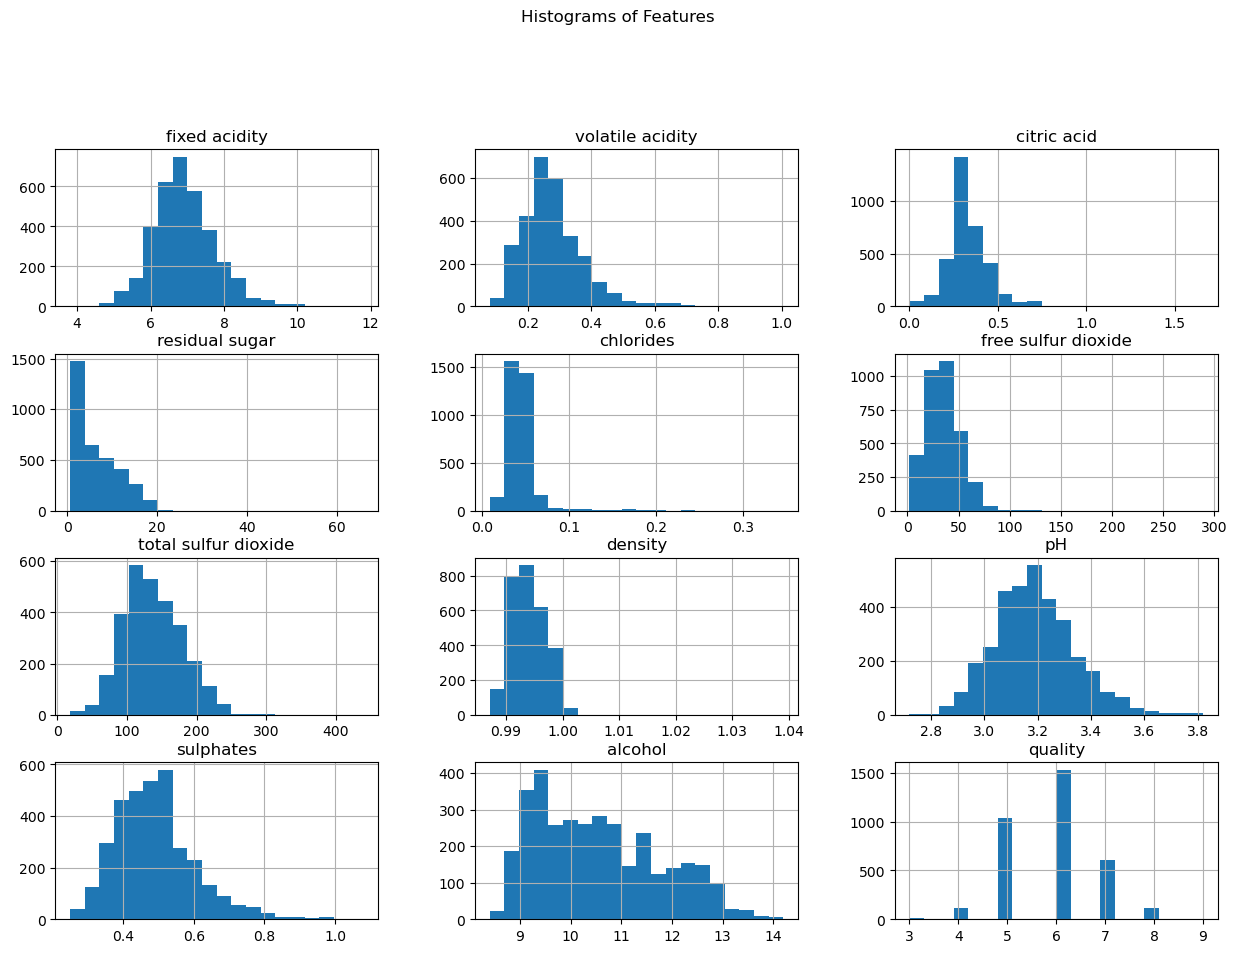

In [5]:
# Histogram of all features
train_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features", y=1.02)
plt.show()


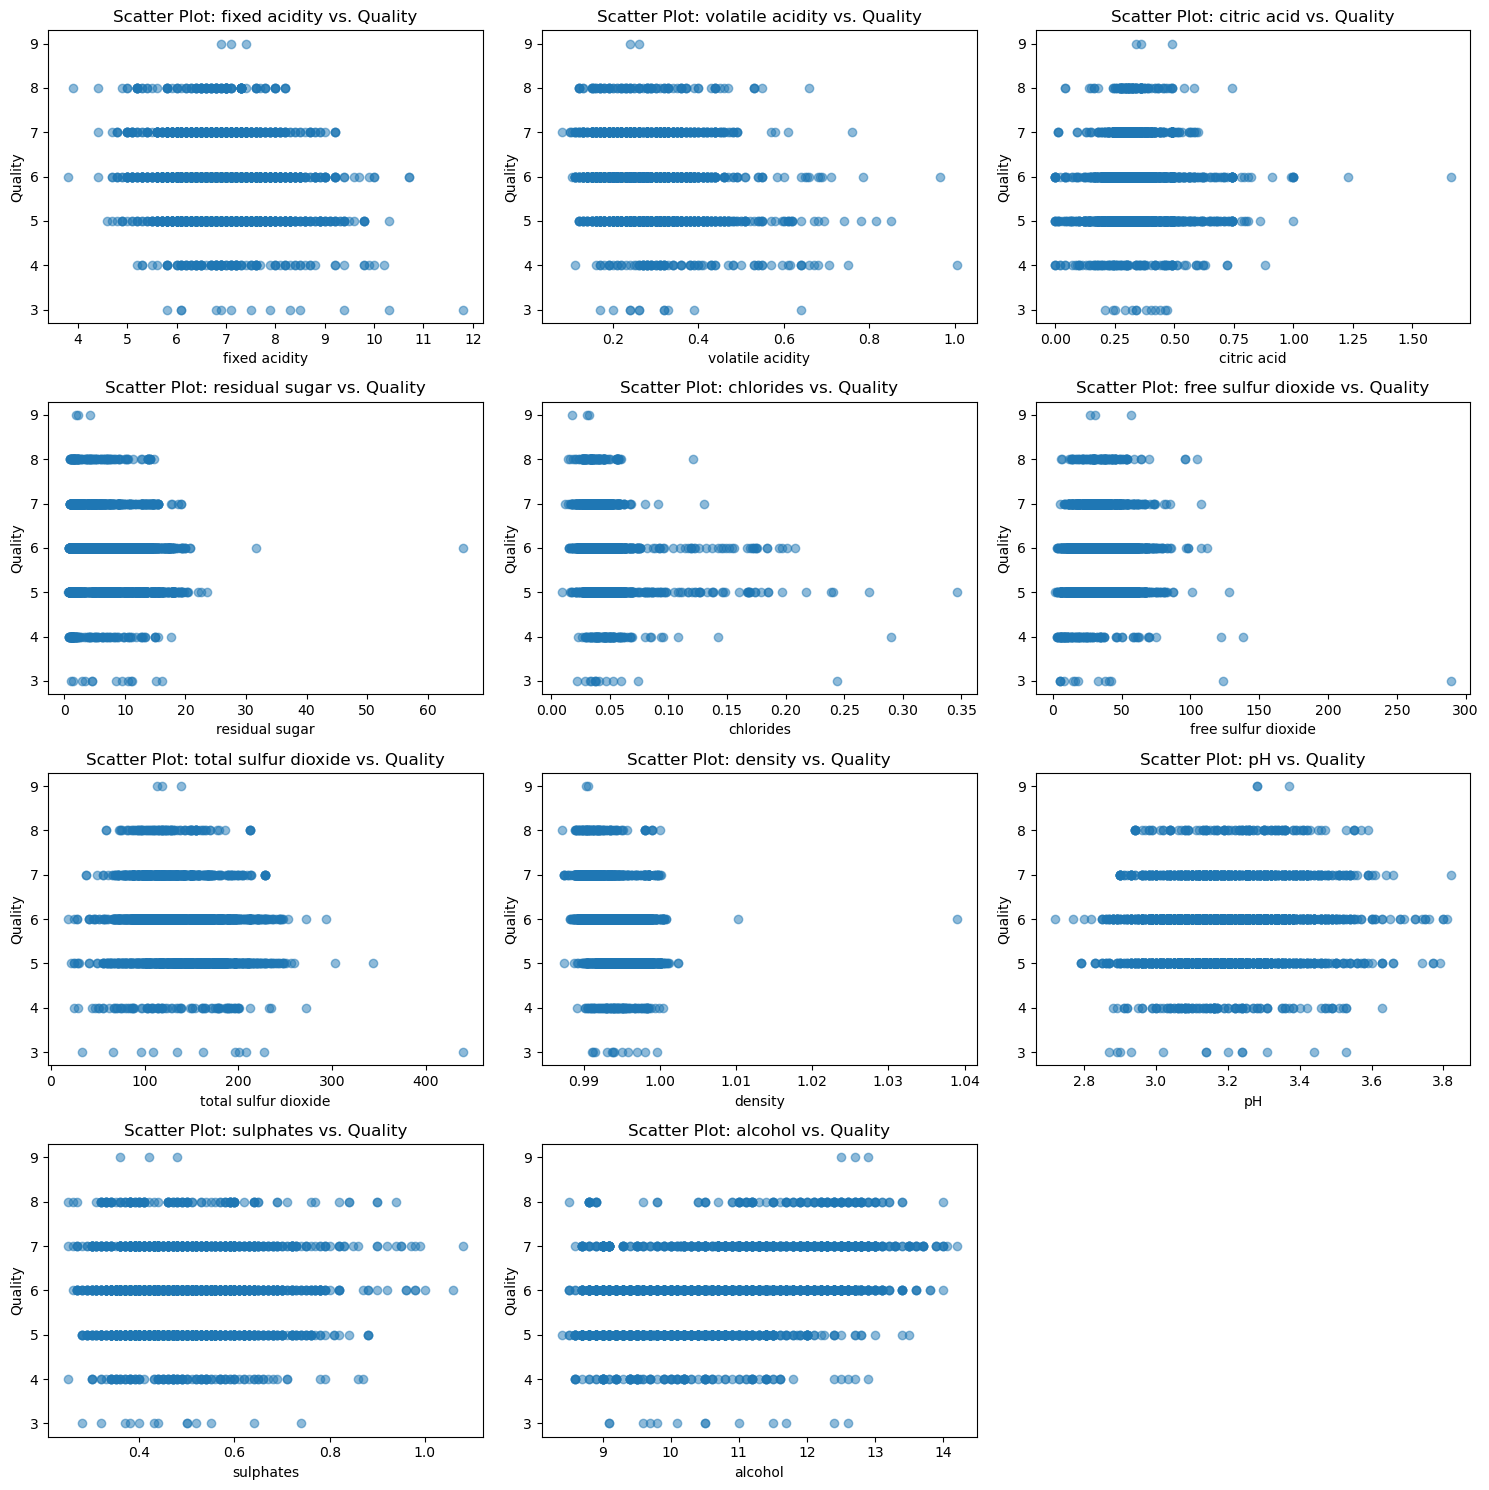

In [6]:
# Create scatterplots for all features based on "quality".
plt.figure(figsize=(15, 15))
for feature in train_data.columns[:-1]:  # Exclude the last column ('quality')
    plt.subplot(4, 3, train_data.columns.get_loc(feature) + 1)
    plt.scatter(train_data[feature], train_data['quality'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot: {feature} vs. Quality')

plt.tight_layout()
plt.show()

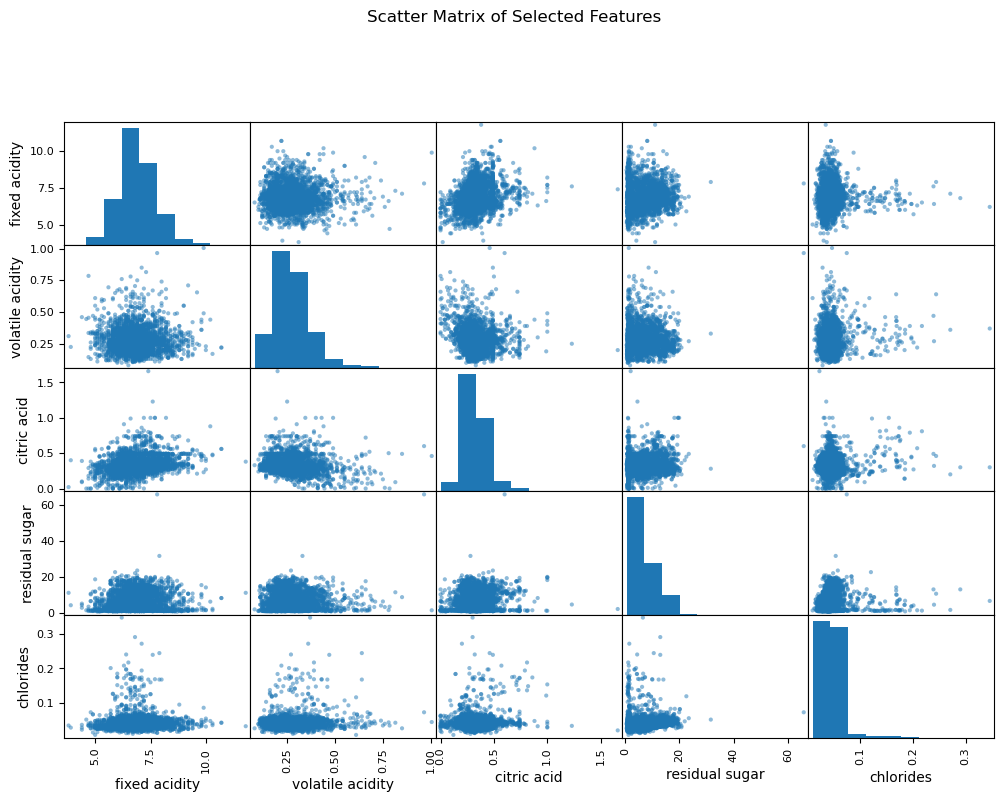

In [7]:
# Scatter matrix of selected features
from pandas.plotting import scatter_matrix

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
scatter_matrix(train_data[selected_features], figsize=(12, 8))
plt.suptitle("Scatter Matrix of Selected Features", y=1.02)
plt.show()

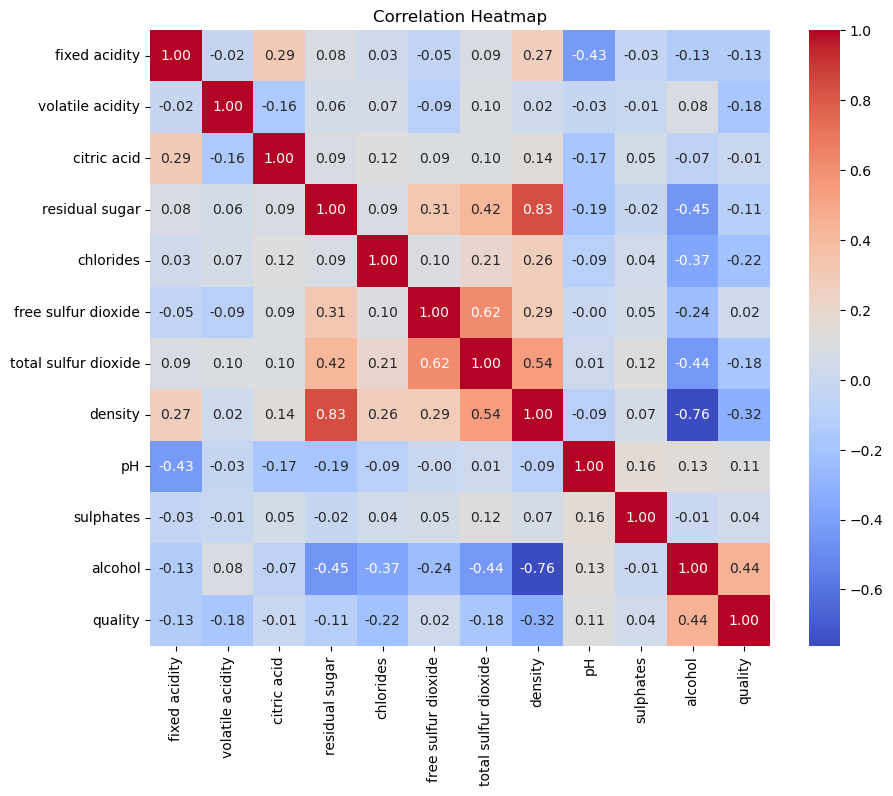

In [8]:
import seaborn as sns

correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data preprocessing, dealing with missing values (1 mark)
Often, when dealing with real-world data, we will find that some values are missing or nonsensical. We need to deal with these missing values before doing any further analysis. Furthermore, once we have dealt with the missing values, we may want to perform standardisation or normalisation on the training data.
- In this dataset, missing values have been filled with `NaN` (Not a Number) values. For features with missing values, use the mean value of the non-missing values of that feature to perform imputation. Save these mean values, you will need them later when performing the validation and testing steps.

- Once you have imputed the missing data, apply feature scaling using the given function `get_stats_normalisation()`. This function takes the imputed dataset and normalises all values to be within the range [0, 1], based on physically plausible minimum and maximum values for each feature (saved in `maxs` and `mins`). Since most of these values are not normally distributed, we choose not to standardise the data, but we can make use of the minimum and maximum values of each feature to normalise the data - in this case we can rely on knowledge of physical variables (domain knowledge), as well as observations from the testing data, to set these values. You may use the given `maxs` and `mins` values throughout the rest of the notebook.

Make sure to leave brief comments in your code to explain the preprocessing steps you have taken.

In [11]:
# Given helper function
# Normalise the data - scales between [0,1], use in case features are not normally distributed
maxs = np.array([15, 1.1, 1.66, 66, 0.35, 290, 440, 1.05, 3.85, 1.1, 15])
mins = np.array([3.8, 0.08, 0.0, 0.5, 0.0, 2.0, 9.0, 0.9, 2.7, 0.2, 8.0])
def get_stats_normalisation(data_local, maxs=maxs, mins=mins):
    """
    Takes an input dataframe, computes the max and min values per column, then scales each column
    to be within those values. If max and min values are given, scales each column to be within given
    range. It assumes the target feature is the last column.

    Returns a numpy array of the scaled features. Note that targets are not returned.
    """
    uX = (data_local.iloc[:, :-1]).values # We get the values of the features
    N2, D = np.shape(uX)
    if maxs is None:        # If max and min values are not given, compute them
        maxs = np.amax(uX, 0)   # We get the max values for each column 
    if mins is None:
        mins = np.amin(uX, 0)   # We get the min values for each column
    nX = np.empty((N2, D))
    for i in range(D):      # scale between min and max values of each feature
        nX[:, i] = (uX[:, i] - mins[i])/(maxs[i] - mins[i])  
    return nX, maxs, mins

In [12]:
# Your code here
# Handle missing values by filling in the mean of non-missing values
mean_values = train_data.mean() # Calculate the mean for each feature
train_data = train_data.fillna(mean_values) # Fill in missing values with mean values

In [13]:
# Normalise the data using the provided functions and the given max and min values
normalised_data, _, _ = get_stats_normalisation(train_data, maxs, mins)

## Building and training a predictive model (4 marks)

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will build a regularised ridge regression model and train it using gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$, call it `yTrain`, and the design matrix $\mathbf{X}$, call it `XTrain`. Remember to augment `XTrain` with a column of ones: this is the design matrix.

In [14]:
yTrain = normalised_data[:, -1] # The training target labels
XTrain = normalised_data[:, :-1] # The standardised inputs with an additional column vector  

XTrain = np.column_stack([np.ones(XTrain.shape[0]), XTrain])

### Finding the optimal $\mathbf{w}$ with stochastic gradient descent

Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set in `XTrain` and `yTrain` to compute the gradient, use a subset of $S$ instances in `XTrain` and `yTrain`. This is sometimes called *minibatch gradient descent,* where $S$ is the size of the minibatch. 

You will need to find the best values for three parameters: $\eta$ (eta), the learning rate, $S$, the number of datapoints in the minibatch, and $\gamma$ (gamma), the regularisation parameter. We can do this using a grid search over the validation set. 

* In this question we will use the validation data. So before proceeding to the next steps, make sure that you replace the missing values in each feature vector with the mean values you computed from the training data, and apply the same feature scaling procedure that you used for the training data. (**1 mark**)

* Write a function, `mgd_optimiser`, that takes as input the training data and targets, the learning rate $\eta$, the minibatch size $S$, the regularisation parameter $\gamma$, and the number of iterations $T$. The function should return the optimal $\mathbf{w}$ after the chosen number of iterations. (**1 mark**)
    
* Create a grid of values for the parameters $\gamma$ and $\eta$ using `np.logspace` and a grid of values for $S$ using `np.linspace`. Because you need to find three parameters, start with five values for each parameter in the grid and see if you can increase it (it may take some time to run). Make sure you understand what is the meaning of `np.logspace` and `np.linspace`. Notice that you can use negative values for `start` in `np.logspace`. (**1 mark**)

* For each value that you have of $\gamma$, $\eta$ and $S$ in your grid, use the training set to compute $\mathbf{w}$ using your `mgd_optimiser` function, and then measure the RMSE using that $\mathbf{w}$ over the validation data. For the validation data, make sure you preprocess it before applying the prediction model over it. For the minibatch gradient descent choose to stop the iterative procedure after $200$ iterations. (**1 mark**)

* Choose the values of $\gamma$, $\eta$ and $S$ that lead to the lowest RMSE and save them. You will use them at the test stage.

In [15]:
# PREPROCESS THE VALIDATION DATA
# Handle missing values in validation data and apply feature scaling
mean_values_val = val_data.mean() # Calculate the mean value for each feature
val_data = val_data.fillna(mean_values_val) # Fill missing values with the mean value

# Normalise the validation data using the provided functions and the given maximum and minimum values
normalized_val_data, _, _ = get_stats_normalisation(val_data, maxs, mins)

# Prepare the target vector "yVal" and the design matrix "XVal".
yVal = normalized_val_data[:, -1] # last column in normalised data is the target (quality)
XVal = normalized_val_data[:, :-1] # all columns except the last one
XVal = np.column_stack([np.ones(XVal.shape[0]), XVal]) # add a column for the intercept 1

In [16]:
# CREATE THE GRID OF VALUES FOR GAMMA, ETA AND S
gamma_values = np.logspace(-4, 2, 5) # Gamma values grid
eta_values = np.logspace(-4, 0, 5) # Grid of ETA values
S_values = np.linspace(10, 100, 5, dtype=int) # S-value grid

In [19]:
# TRAIN THE REGULARISED LINEAR MODEL AND COMPUTE THE RMSE FOR ALL VALUES OF GAMMA, ETA AND S

def sgd_optimiser(X, y, gamma, eta, S, D, max_iters):
    # Initialize weight vector w
    w = np.zeros(D)

    for t in range(max_iters):
        # Shuffle the training data randomly
        random_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[random_indices]
        y_shuffled = y[random_indices]

        for i in range(0, X.shape[0], S):
            X_batch = X_shuffled[i:i + S]
            y_batch = y_shuffled[i:i + S]

            # Calculate predictions
            predictions = np.dot(X_batch, w)

            # Compute the errors (residuals)
            errors = y_batch - predictions

            # Compute the gradient of the loss function with regularization
            gradient = -2 * np.dot(X_batch.T, errors) + 2 * gamma * w

            # Update weights using the gradient
            w -= eta * gradient

    return w


# Your code here

best_gamma = None
best_eta = None
best_S = None
best_rmse = float('inf')

for gamma in gamma_values:
    for eta in eta_values:
        for S in S_values:
            iters = 0  # Initialize iteration count
            # Train the model using SGD
            w = sgd_optimiser(XTrain, yTrain, gamma, eta, S, XTrain.shape[1], max_iters=200)

            # Predict on validation data
            predictions_val = np.dot(XVal, w)

            # Calculate RMSE for validation data
            rmse = np.sqrt(np.mean((yVal - predictions_val) ** 2))

            # Check if this combination has the lowest RMSE
            if rmse < best_rmse:
                best_gamma = gamma
                best_eta = eta
                best_S = S
                best_rmse = rmse
            iters += 1  # Increment iteration count
            if iters == 200:
                break

# print the each best parameters
print("Best parameters are:\ngamma: ", best_gamma, "\neta: ", best_eta, "\nS: ", best_rmse , "\nRmse")

/var/folders/2m/yws6kw4j5czdcv_550zh7l200000gn/T/ipykernel_87496/426317533.py:24: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * np.dot(X_batch.T, errors) + 2 * gamma * w
/var/folders/2m/yws6kw4j5czdcv_550zh7l200000gn/T/ipykernel_87496/426317533.py:27: RuntimeWarning: invalid value encountered in subtract
  w -= eta * gradient
/var/folders/2m/yws6kw4j5czdcv_550zh7l200000gn/T/ipykernel_87496/426317533.py:24: RuntimeWarning: overflow encountered in add
  gradient = -2 * np.dot(X_batch.T, errors) + 2 * gamma * w


Best parameters are:
gamma:  0.0001 
eta:  0.01 
S:  0.11792238478898942 
Rmse


## Testing and results reporting (3 marks)

We now know the best model, according to the validation data. We will now put together the training data and the validation data and perform the preprocessing as before, this is, impute the missing values and scale the inputs. We will train the model again using the minibatch stochastic gradient descent and finally compute the RMSE over the test data.

* (1) In this question we will use the test data. First, combine the original training and validation data and perform the preprocessing again on this new data. Save the values from this preprocessing step. 

* Re-train your model on the full training set, using the optimal values of $\gamma$, $\eta$ and $S$. (**1 mark**)

* Preprocess the test data using the values saved in step (1). (**1 mark**)

* Run your model on the test data using the optimal values of of $\gamma$, $\eta$ and $S$, and report the RMSE. (**1 mark**)

In [20]:
# Your code here
# Merge the original training data and validation data
combined_data = pd.concat([train_data, val_data], axis=0)
mean_values_combined = combined_data.mean()  # Calculate the mean for each feature
combined_data = combined_data.fillna(mean_values_combined)  # Fill missing values with the mean

XCombined_normalisation, _, _ = get_stats_normalisation(combined_data, maxs, mins)

# Prepare target vector "yCombined" and design matrix "XCombined"
yCombined = XCombined_normalisation[:, -1]  # The last column in the normalized data is the target (quality)
XCombined = XCombined_normalisation[:, :-1]  # All columns except the last one
XCombined = np.column_stack([np.ones(XCombined.shape[0]), XCombined])  # Add a column of ones for the intercept


In [21]:
mean_values_test = test_data.mean()  # Calculate the mean for each feature
test_data = test_data.fillna(mean_values_test)  # Fill missing values with the mean

# Normalize the test data using the provided function and given max and min values
normalized_test_data, _, _ = get_stats_normalisation(test_data, maxs, mins)
yTest = normalized_test_data[:, -1]  # The last column in the normalized data is the target (quality)
XTest = normalized_test_data[:, :-1]  # All columns except the last one
XTest = np.column_stack([np.ones(XTest.shape[0]), XTest])  # Add a column of ones for the intercept


In [22]:
# 
w = sgd_optimiser(XCombined, yCombined, best_gamma, best_eta, best_S, XCombined.shape[1], max_iters=200)
# Preprocess the test data, including handling missing values and feature scaling
XTest, _, _ = get_stats_normalisation(test_data, maxs=maxs, mins=mins)
# Make predictions using the model
predictions_test = np.dot(XTest, w)

# Calculate the RMSE for the test data
rmse_test = np.sqrt(np.mean((yTest - predictions_test) ** 2))

print("RMSE on Test Data:", rmse_test)

RMSE on Test Data: 1.959855542727299
